In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("house_prices.csv")

X = data.drop('price',axis=1)
y = data['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
k_values = range(1, 26, 2)
cv_rmse = []

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring="neg_root_mean_squared_error", cv=kf)
    cv_rmse.append(-scores.mean())

best_k = k_values[np.argmin(cv_rmse)]
print("Best k from CV:", best_k)

Best k from CV: 5


In [10]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [11]:
y_pred = knn.predict(X_test_scaled)

In [13]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"Cross-Validation RMSE: {min(cv_rmse):.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")

Cross-Validation RMSE: 270448.53
Test RMSE: 326632.34
Test R²: -0.35


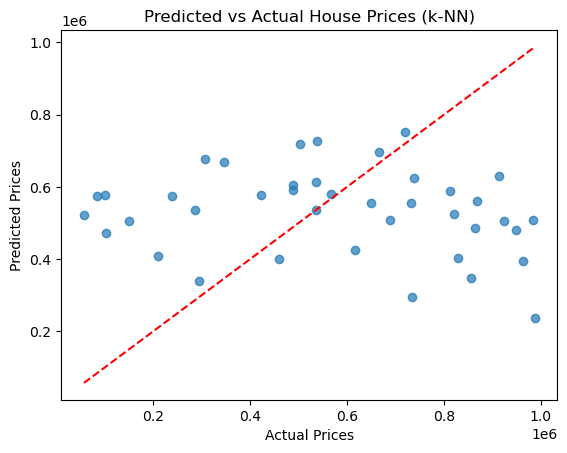

In [15]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices (k-NN)")
plt.show()